# Sales Analysis

In [174]:
#### Import necessary libraries & read csv file 
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("all_data.csv")


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

### Drop rows of NAN 

In [175]:
df = df.dropna()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Get rid of text in "order date" column and then convert it into datetime

In [176]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


### Make columns correct type ( By using __" to_numeric " __  , Convert the columns with numeric values into           integer or float ) . 
check this link to know how to use it  https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [177]:
numeric_columns =['Quantity Ordered', 'Price Each']
df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


### Augment data with additional columns

In [178]:
#### Add month column
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0


In [179]:
#### Add city column (containing city & state in this columns.) ex: df['City'][0] = 'Dallas (TX)'
city_state = df['Purchase Address'].str.split(',', expand=True)
df['City'] = city_state[1].str.strip()+'('+city_state[2].str.split(' ', expand=True)[1]+')'
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,Boston(MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles(CA)
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0,Los Angeles(CA)
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0,San Francisco(CA)
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0,San Francisco(CA)
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0,San Francisco(CA)


## Data Exploration!

In [180]:
#### Question 1: What was the best month for sales? How much was earned that month?
## sales = Quantity_order x price Each
df['sales']=df['Quantity Ordered']*df['Price Each']
monthly_sales = df.groupby('Month')['sales'].sum()
best_month = monthly_sales.idxmax()
best_month, monthly_sales.loc[best_month]

(12.0, 4613443.34)

In [181]:
#### Question 2: What city sold the most product?
df.groupby('City')['Quantity Ordered'].sum().idxmax()

'San Francisco(CA)'

In [182]:
#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
## Step1: Add hour column
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,sales,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,Dallas(TX),23.90,8.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,Boston(MA),99.99,22.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles(CA),600.00,14.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles(CA),11.99,14.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles(CA),11.99,9.0
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0,Los Angeles(CA),8.97,20.0
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0,San Francisco(CA),700.00,16.0
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0,San Francisco(CA),700.00,7.0
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0,San Francisco(CA),379.99,17.0


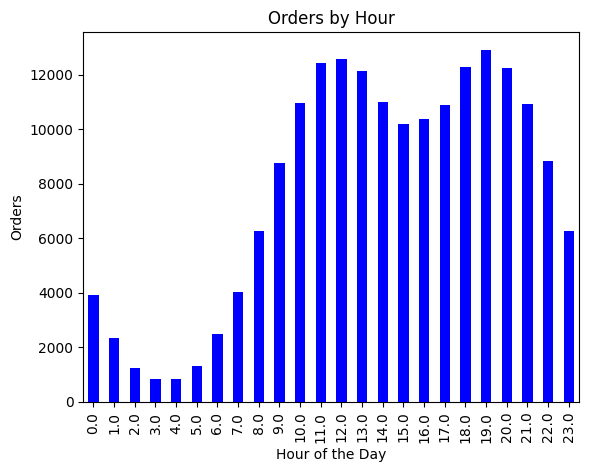

In [183]:
## Step2: show by using plot , get the most hour which clients make orders >>>  19.0
# Count the number of orders per hour
hourly_orders =df['Hour'].value_counts().sort_index()
hourly_orders.plot(kind='bar', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Orders')
plt.title('Orders by Hour')
# plt.xticks(rotation=0)
plt.show()

In [184]:
#### Question 4: What products are most often sold together?
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df[['Order ID', 'Grouped']].drop_duplicates()



,Order ID,Grouped
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable
...,...,...
186845,259353,AAA Batteries (4-pack)
186846,259354,iPhone
186847,259355,iPhone
186848,259356,34in Ultrawide Monitor


In [185]:
#### What product sold the most? Why do you think it sold the most?
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

C:\Users\FREINDS\AppData\Local\Temp\ipykernel_9904\2129465502.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
Product                           0.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

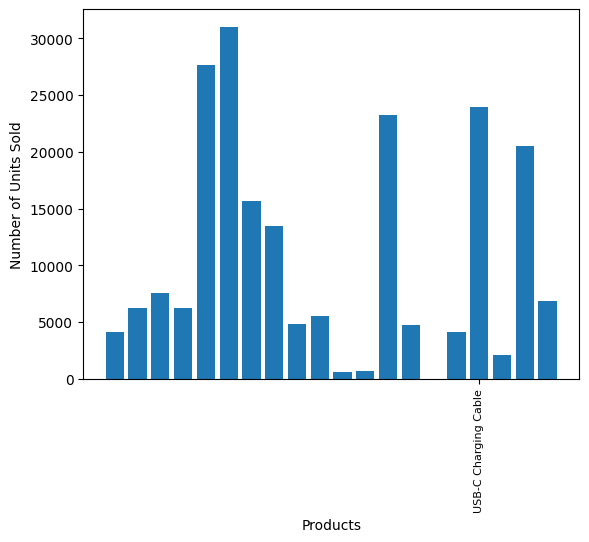

In [188]:
plt.bar(quantity_ordered.index, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Number of Units Sold')
plt.xlabel('Products')
plt.show()